In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
DATADIR = "training/train/"

In [3]:
CATEGORIES=["angry","disguist","fear","happy","neutral","sad","surprise"]

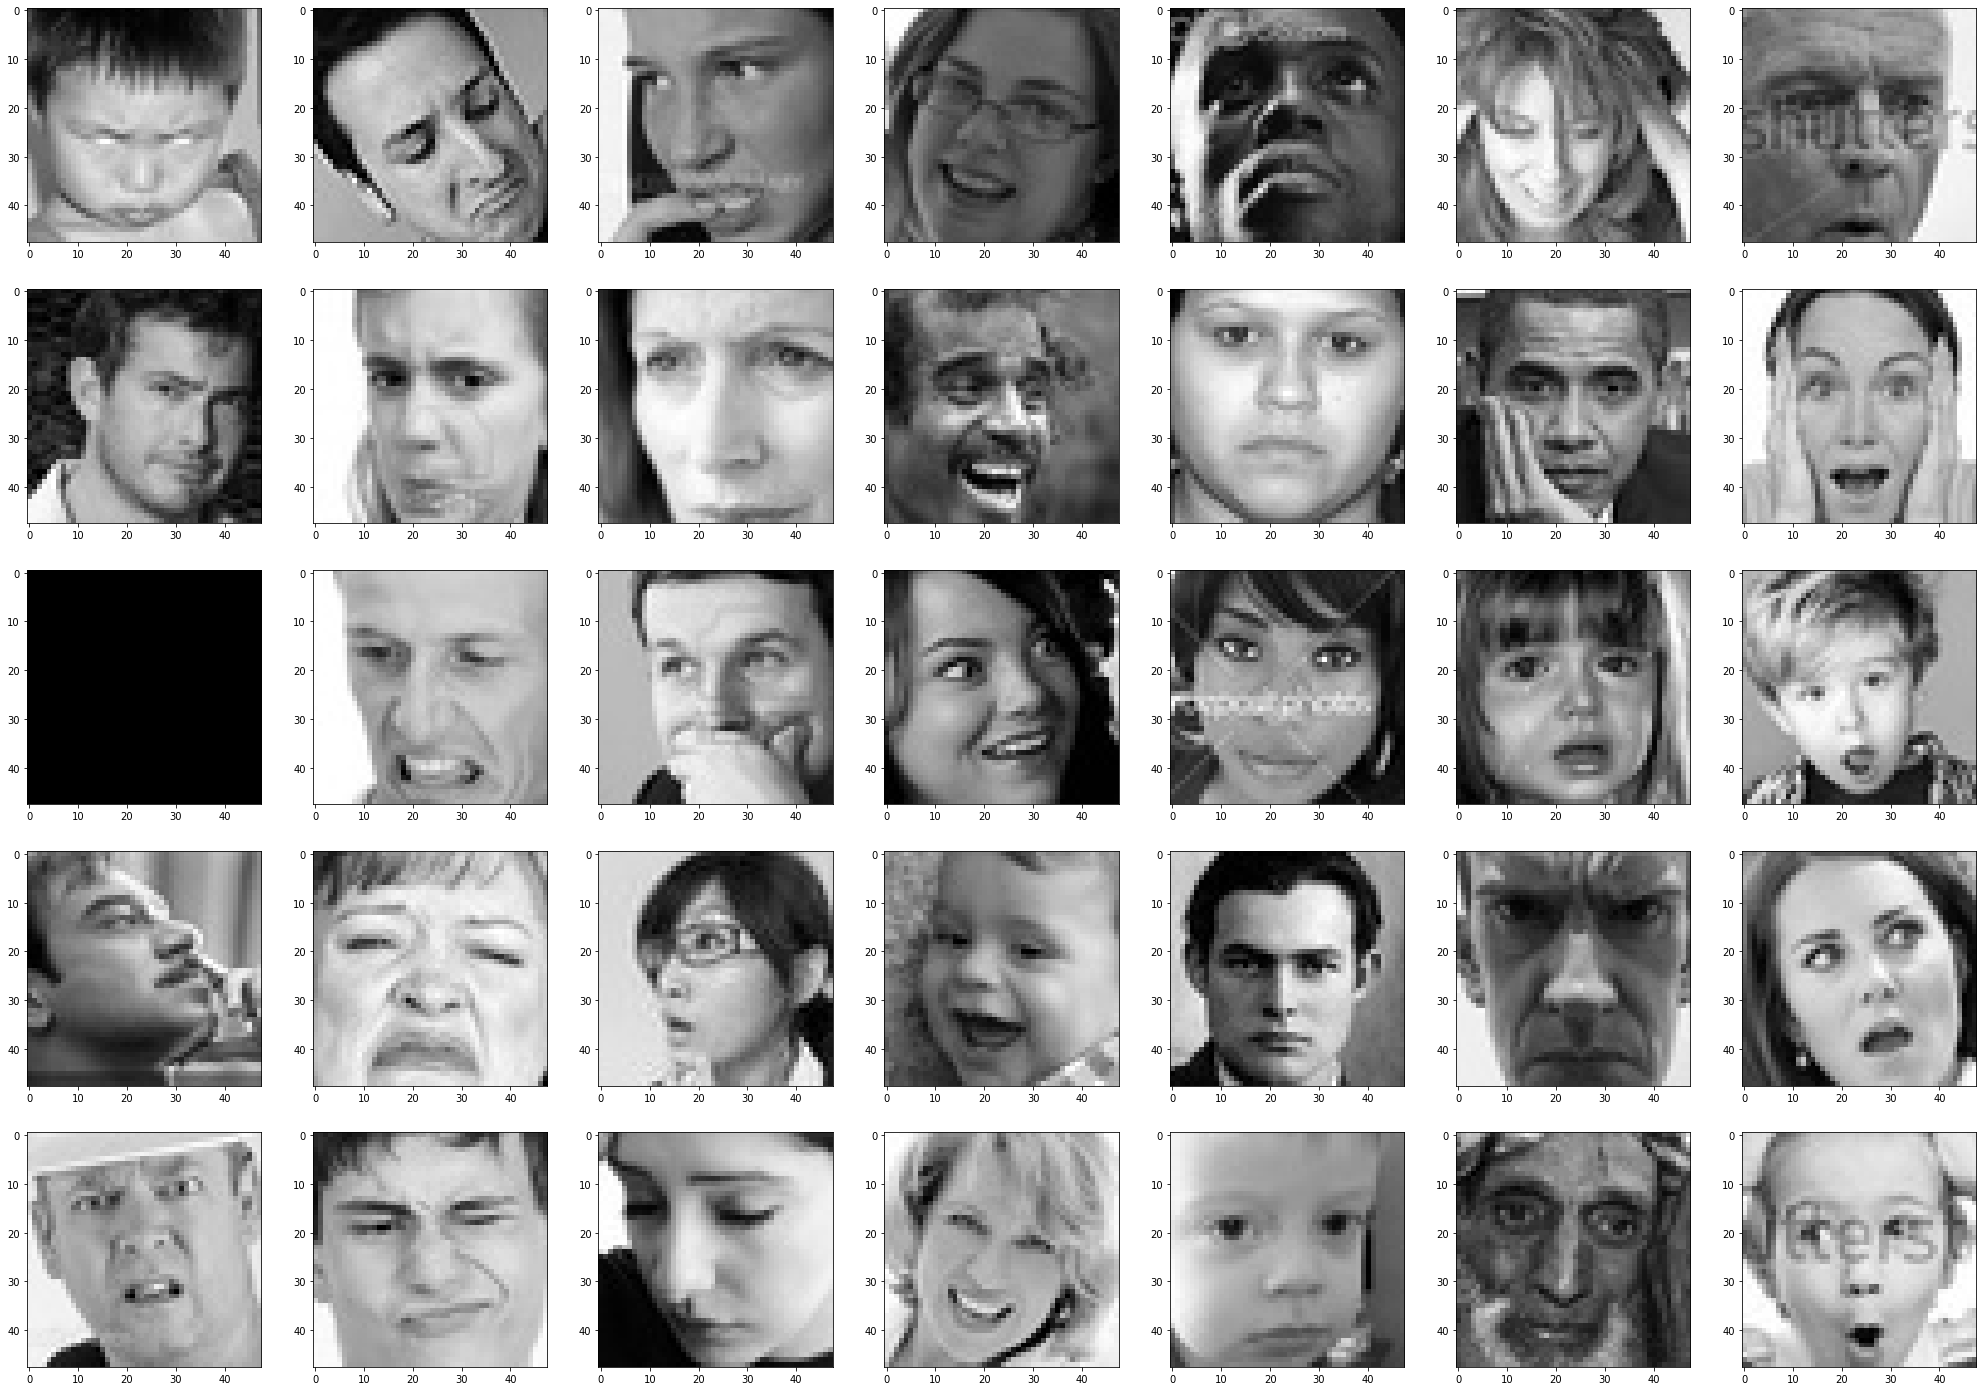

In [5]:
train_dir = DATADIR
test_dir = "training/train/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

In [10]:
opDict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

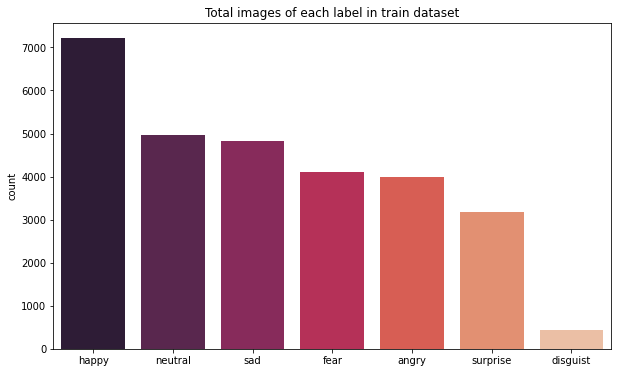

In [11]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="rocket", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

In [12]:
import os
base_path = "training/"
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3995 angry images
436 disguist images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


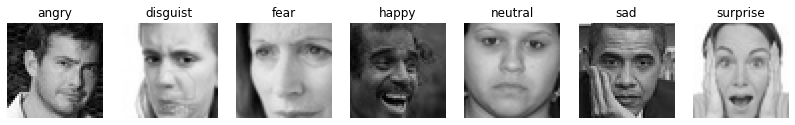

In [9]:
plt.figure(figsize=(14,22))
i = 1

for exp in os.listdir(DATADIR):
    
    img = load_img((DATADIR + exp + '/' + os.listdir(DATADIR + exp)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
#     print(img.size)
    plt.title(exp)
    plt.axis('off')
    i += 1
    
plt.show()

c:\users\chandana\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


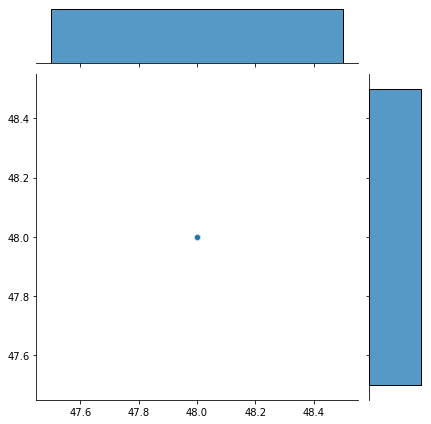

In [13]:
happy = os.listdir(train_dir+'happy/')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
sns.jointplot(dim1, dim2)
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.nn import relu, softmax
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import categorical_crossentropy

tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=relu, input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation=relu))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation=relu))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation=relu))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation=relu))
model.add(Dropout(0.2))

model.add(Dense(1024, activation=relu))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation=softmax))

model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), loss=categorical_crossentropy, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [2]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

early_stop = EarlyStopping(monitor='val_loss', patience=5)
callbacks = [early_stop,]

In [31]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 400

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/3
898/898 [==============================] - 4074s 5s/step - loss: 1.1522 - accuracy: 0.5672
Epoch 2/3
898/898 [==============================] - 3663s 4s/step - loss: 1.0441 - accuracy: 0.6063
Epoch 3/3
898/898 [==============================] - 3586s 4s/step - loss: 0.9723 - accuracy: 0.6358


In [305]:
new_model.save("ferNet.h5")

In [30]:
from tensorflow import keras
saved_model=keras.models.load_model("ferNet.h5")

In [43]:
opDict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

(48, 48)
(1, 48, 48)


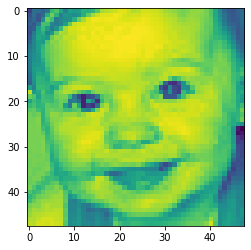

In [31]:
from keras.preprocessing import image
img = image.load_img("training/test/happy/PublicTest_98111104.jpg",target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
img=img/255.0
plt.show()

In [32]:
predictions=saved_model.predict(img)
predictions[0]

array([4.1528932e-05, 2.3990442e-11, 1.2713161e-04, 9.0528733e-01,
       9.4244577e-02, 3.6441434e-05, 2.6290532e-04], dtype=float32)

In [33]:
result = saved_model.predict(img)
result=list(result[0])
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])

3
Happy


(48, 48)
(1, 48, 48)


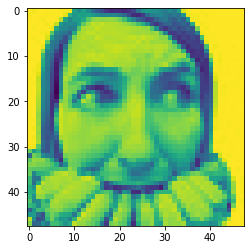

In [56]:
from keras.preprocessing import image
img = image.load_img("training/test/fear/PrivateTest_36157636.jpg",target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
img=img/255.0
plt.show()

In [57]:
predictions=saved_model.predict(img)

In [58]:
predictions[0]

array([1.9467419e-07, 1.1764283e-10, 9.9991715e-01, 4.8587071e-06,
       1.7416093e-06, 5.2863255e-05, 2.3098608e-05], dtype=float32)

In [59]:
result = saved_model.predict(img)
result=list(result[0])
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])

2
Fear


(48, 48)
(1, 48, 48)


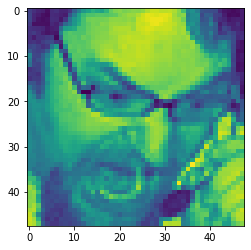

In [60]:
from keras.preprocessing import image
img = image.load_img("training/test/angry/PrivateTest_10131363.jpg",target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
img=img/255.0
plt.show()

In [61]:
predictions=saved_model.predict(img)
predictions[0]

array([9.4126117e-01, 2.3710378e-03, 1.9055786e-02, 6.7053596e-03,
       3.9881186e-04, 2.9977551e-02, 2.3026056e-04], dtype=float32)

In [62]:
result = saved_model.predict(img)
result=list(result[0])
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])

0
Angry


(48, 48)
(1, 48, 48)


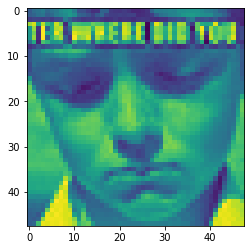

In [63]:
from keras.preprocessing import image
img = image.load_img("training/test/sad/PrivateTest_3062720.jpg",target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
img=img/255.0
plt.show()

In [64]:
predictions=saved_model.predict(img)
predictions[0]

array([7.1335234e-02, 3.2208212e-05, 1.6532606e-01, 5.9751073e-05,
       2.1699357e-01, 5.4328799e-01, 2.9652009e-03], dtype=float32)

In [65]:
result = saved_model.predict(img)
result=list(result[0])
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])

5
Sad


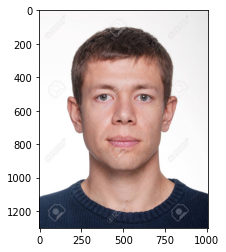

In [18]:
f=cv2.imread("xy.jpg")
plt.imshow(cv2.cvtColor(f,cv2.COLOR_BGR2RGB))

In [19]:
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

In [20]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=f[y:y+h,x:x+w]
        cv2.rectangle(f,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
    

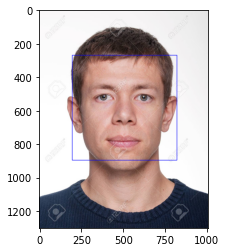

In [21]:
plt.imshow(cv2.cvtColor(f,cv2.COLOR_BGR2RGB))

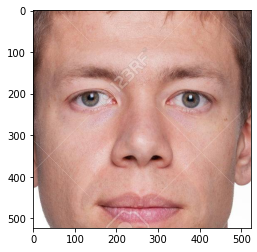

In [23]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))
im=cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)

In [40]:
from keras.preprocessing import image
img = image.load_img(fr,target_size=(48,48),color_mode='grayscale')
img = np.array(img)
img=np.expand_dims(img,axis=0)
from keras.models import load_model
img = img.reshape(1,48,48,1)
img=img/255.0

In [41]:
predictions=saved_model.predict(img)
predictions[0]

array([3.6327194e-02, 1.5601172e-05, 5.9593044e-02, 2.2108279e-02,
       8.4567237e-01, 3.2010052e-02, 4.2734821e-03], dtype=float32)

In [42]:
result = saved_model.predict(img)
result=list(result[0])
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])

4
Neutral


In [43]:
import cv2
import sys
import matplotlib as plt
#import Mymodel as mpm
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import matplotlib as plt
import keras
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

model = keras.models.load_model('ferNet.h5')

emo     = ['Angry', 'disgust', 'fear',
           'happy', 'sad','surprise', 'Neutral']    
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangular_bgr=(255,255,255)
img = np.zeros((500,500))
text="Some text in a box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangular_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while(True):
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=3,
        minSize=(48, 48)
    )
    for (x, y, w, h) in faces:
        img=cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        im=img
    cv2.imshow('Video', frame)
    detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
    detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY)
    detected_face = cv2.resize(detected_face, (48, 48))
    detected_face = detected_face.astype(np.float64)
    st=StandardScaler()
    img_pixels=st.fit_transform(detected_face)
    img_pixels=img_pixels.reshape(1,48,48,1)
    
    predictions = model.predict(img_pixels)
    max_index = np.argmax(predictions[0])
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    if(np.argmax(predictions)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    elif (np.argmax(predictions)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    elif (np.argmax(predictions)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    elif (np.argmax(predictions)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    elif (np.argmax(predictions)==4):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    elif (np.argmax(predictions)==5):
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
    else:
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,255))
        
    cv2.imshow('FACE EXPRESSION RECOGNITION',frame)
    if(cv2.waitKey(2)&0xFF==ord('q')):
        break

KeyboardInterrupt: 

In [44]:
video_capture.release()
cv2.destroyAllWindows()